<a href="https://colab.research.google.com/github/20hnu/machine_learning/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats

import seaborn as sns

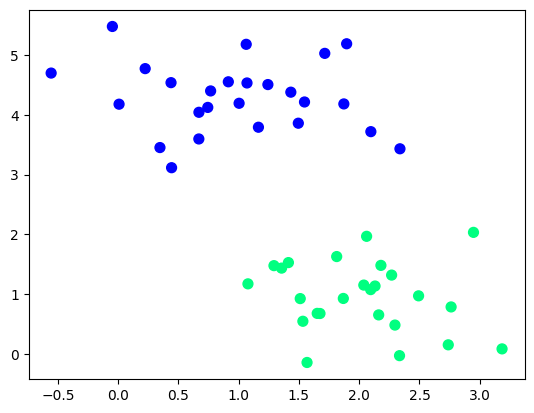

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 50, centers=2, random_state = 0, cluster_std = 0.60)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="winter")
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="linear",C=1)
model.fit(X,y)

SVC(C=1, kernel='linear')

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [ ]:
def plot_svc_decision_function(model, ax=None,plot_support=True):
  if ax is None:
    ax = plt.gca()

  xlim= ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0],xlim[1],30)
  y= np.linspace(ylim[0],ylim[1],30)

  Y,X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(),Y.ravel()]).T
  p = model.decision_function(xy).reshape(X.shape)


  ax.contour(X,Y,p,colors='k', levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
      s=300,linewidth=1,facecolors='none');

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

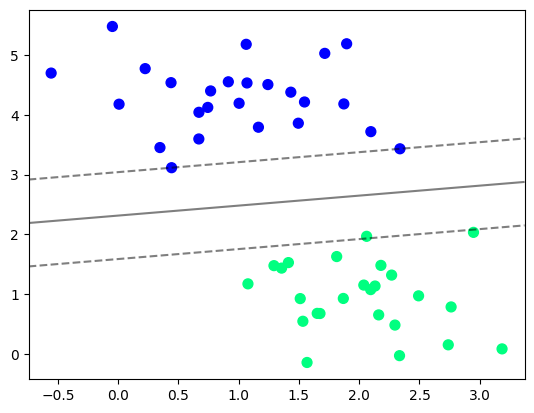

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model);

In [ ]:
# book

import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y=  (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
import pandas as pd
iris = load_iris(as_frame=True)

In [ ]:
df = pd.DataFrame(iris,columns=["sepal length (cm)","sepal width (cm)"," petal length (cm)","petal width (cm)"])

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()


In [ ]:
X_new=[[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)


In [ ]:
X

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445],
       [ 0.38220326,  0.76957897],
       [-0.32279169,  0.92145523],
       [ 1.29900621, -0.64914275],
       [-0.63569974,  0.91873422],
       [ 1.96899387,  0.297549  ],
       [ 1.21073294,  0.37721455],
       [ 1.13998191, -0.36088456],
       [ 1.06805159, -0.53460667],
       [ 0.49598571,  0.66135542],
       [-0.26038715,  0.88295876],
       [-0.06516219,  0.13092506],
       [ 1.87005845, -0.18659309],
       [ 0.03146515,  0.79868048],
       [-1.03151461,  0.35788726],
       [ 0.45814234,  0.00308109],
       [ 0.40767679,  0.9574049 ],
       [-0.9379972 ,  0.46846678],
       [ 2.02675758,  0.09006383],
       [ 0.73867736,

In [ ]:
X_moon =[[0,0],[-1.10,  0.23]]


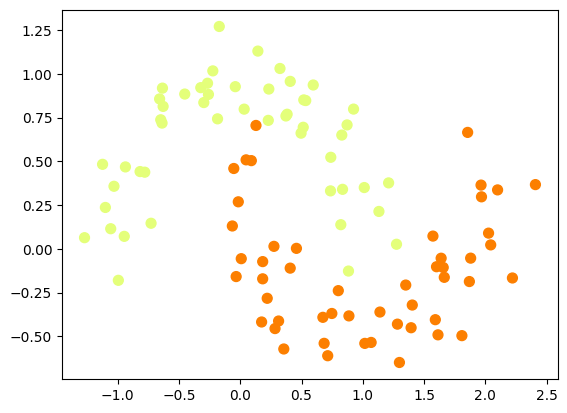

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="Wistia")

In [ ]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter = 10_000,random_state=42)

    )

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="poly",degree = 3,coef0=1,C=5))
poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.predict(X_moon)
poly_kernel_svm_clf.decision_function(X_moon)

array([ 1.42190585, -5.34994363])

In [ ]:
#Gaussian RBF

rbf_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="rbf",gamma=5,C=1000))

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=5))])

In [ ]:
rbf_kernel_svm_clf.predict(X_moon)

array([1, 0])

In [ ]:
rbf_kernel_svm_clf.decision_function(X_moon)

array([ 1.14272558, -1.00624395])

In [ ]:
#Linear Support Vector Machines
from sklearn.svm import LinearSVR

x = np.linspace(0, 100, 100) # 1000 values between 0 and 100
# delta = np.random.uniform(-10, 10, x.size)
y = 0.4*x + 3

In [ ]:
x =x.reshape(-1,1)

In [ ]:
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(x,y)  #Requires 2D data in input

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0, random_state=42))])

In [ ]:
svm_reg.predict([[2]])

array([3.8])

In [ ]:
#for polynomial regression
from sklearn.svm import SVR
svm_poly_reg = make_pipeline(StandardScaler(),SVR(kernel="poly",degree=2,C=0.01,epsilon=0.1))
svm_poly_reg.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [ ]:
svm_poly_reg.predict([[2]])

array([23.])

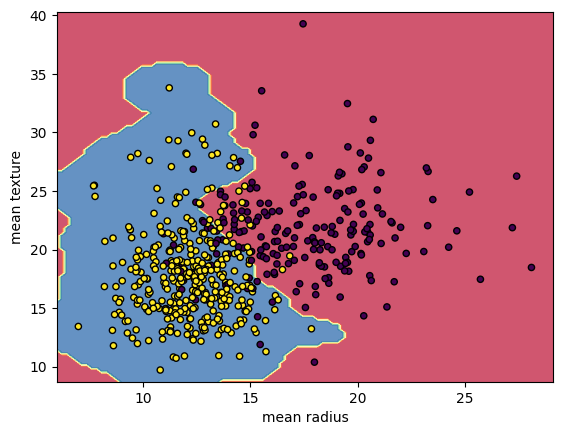

In [ ]:
#geeks for geek
# Load the important packages
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

In [ ]:

cancer.data[:,:2]  #all row and first twocolumns from each row

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [ ]:
X

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#question no.10
from sklearn.datasets  import load_wine
wine=load_wine()

In [ ]:
type(wine)

sklearn.utils._bunch.Bunch

In [ ]:
X = wine.data[:, :2]
y = wine.target

In [ ]:
X

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
svm_classifier = make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=0.5, C=1.0))
# Trained the model
svm_classifier.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma=0.5))])

In [ ]:
test = [[14,3],[11,2]]
ans = svm_classifier.predict(test)
ans

array([2, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score([0,1],ans)


In [ ]:
accuracy

0.5